In [983]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as encode
import matplotlib.pyplot as plt
%matplotlib inline

In [984]:
# Read data and split columns
df = pd.read_table('auto-mpg.data', header=None) 
df.columns = ['one','car name']
df[['mpg','cylinders','displacement',
    'horsepower','weight','acceleration',
    'model year','origin']] = df['one'].str.split(expand=True)
df = df.drop(['one'],axis=1)
df.head()

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693.,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436.,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433.,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449.,10.5,70,1


In [985]:
# Add 0 digit to weight column
df['weight'] = df['weight'].apply(lambda x : str(x) + '0')
df.head()

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [986]:
# Clean, encode and normalize data
df = df[df['horsepower'] != '?'] # Drop blanks
enc = p.LabelEncoder() # Encode car name column
enc.fit(df['car name'])
df['car name'] = enc.transform(df['car name'])
to_norm = ['mpg','displacement','horsepower','weight','acceleration'] # Normalize real-valued columns
df[to_norm] = df[to_norm].astype(float)
df[to_norm] = df[to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,48,0.239362,8,0.617571,0.456522,0.070726,0.238095,70,1
1,35,0.159574,8,0.728682,0.646739,0.077795,0.208333,70,1
2,229,0.239362,8,0.645995,0.565217,0.068183,0.178571,70,1
3,13,0.186170,8,0.609819,0.565217,0.068070,0.238095,70,1
4,159,0.212766,8,0.604651,0.510870,0.068669,0.148810,70,1


In [987]:
# Multiple Linear Regression
X = df.drop(['mpg'],axis=1).astype(float) # X matrix
X['B_0'] = 1 # Append vector of 1's for Beta_0
X = X[['B_0','car name','cylinders', # Put Beta_0 column as first
       'displacement','horsepower', # column for matrix multiplication
       'weight','acceleration',
       'model year','origin']].values
Y = df['mpg'].values.astype(float) # Y vector

In [988]:
XTX = np.dot(X.transpose(),X) # X^T*X
XTY = np.dot(X.transpose(),Y) # X^T*Y
Beta = np.dot(np.linalg.inv(XTX),XTY) # Beta = ((X^T*X)^-1)(X^T*Y)
print(Beta)

[ -7.17639338e-01   5.71411633e-05  -2.37640875e-02  -7.28198912e-02
  -3.77872755e-01  -1.81052231e-01  -1.69011878e-01   1.82244510e-02
   4.34973846e-02]


In [989]:
SSE = 0.0
SST = 0.0
under = 0
over = 0
exact = 0
predicted = []
B_0 = Beta[0]
Beta = np.delete(Beta,0)
for idx, row in temp.iterrows():
    predicted.append(B_0 + np.dot(Beta.transpose(), row.values.astype(float)))
    diff = df.loc[idx]['mpg'].astype(float) - predicted[-1]
    if diff > 0:
        under += 1
    elif diff < 0:
        over += 1
    else:
        exact += 1
    SSE += diff**2
    SST += (df.loc[idx]['mpg'].astype(float) - df['mpg'].mean())**2
            
SSR = SST - SSE
print('R^2 =',SSR/SST)
print('Number underestimated: ' + str(under) + ', ' + str(under/len(df)*100) + '%')
print('Number overestimated: ' + str(over) + ', ' + str(over/len(df)*100) + '%')
print('Number exact: ' + str(exact) + ', ' + str(exact/len(df)*100) + '%')

R^2 = 0.778866130964
Number underestimated: 179, 45.66326530612245%
Number overestimated: 213, 54.33673469387755%
Number exact: 0, 0.0%


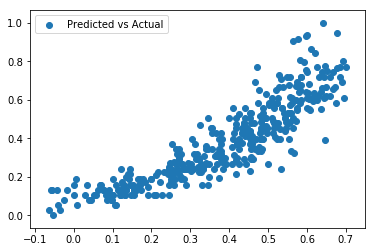

In [990]:
# Plot predictions versus actual values
plt.scatter(predicted, df['mpg'], label='Predicted vs Actual')
plt.legend()

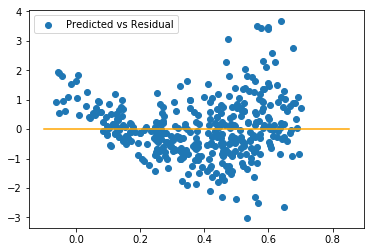

In [991]:
# Plot residuals for each prediction
residuals = df['mpg'] - predicted
residuals = (residuals - residuals.mean()) / residuals.std() # Standardize residuals
plt.scatter(predicted, residuals, label='Predicted vs Residual')
x = np.arange(-0.1,0.9,.05,)
plt.plot(x, np.zeros(20), color='orange')
plt.legend()